# <span style="color:darkblue"> Lecture 24 - Text Data  </span>

<font size = "5">

In  this lecture we will work with text data

- Basic summary and data manipulation
- Generate word clouds!

# <span style="color:darkblue"> I. Import Libraries and Data </span>

<font size = "5">

Installation

In [1]:
# If you're using base Python, open the terminal and type
#   pip3 install wordcloud

# If you're using Anaconda, open the termianl and type
#   conda install -c https://conda.anaconda.org/conda-forge wordcloud
# Note: You will get a prompt for whether you want to continue. Type yes:
#    y 
# Note: this is another way to install packages, especially custom ones that
# are not included in the standard Anaconda libraries.

<font size = "5">

Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

<font size = "5">

Import Data

- Congressional bills in the United States

In [3]:
bills_actions = pd.read_csv("data_raw/bills_actions.csv")
bills_actions.dtypes

Congress        int64
bill_number     int64
bill_type      object
action         object
main_action    object
category       object
member_id       int64
dtype: object

# <span style="color:darkblue"> II. Basic Text Operations </span>

<font size = "5">

Count Frequency

In [4]:
bills_actions["category"].value_counts()

amendment                       1529
house bill                       902
senate bill                      514
house resolution                 234
senate resolution                 60
house joint resolution            22
house concurrent resolution       20
senate concurrent resolution      14
senate joint resolution            8
Name: category, dtype: int64

<font size = "5">

Subset text categories

In [5]:
# For this analysis we are only interested in bills. With ".query()" ...
#     - We select all entries in the column called "category" 
#       which have values contain in "list_categories"
#     - "in" is used to test whether a word belongs to a list
#     - @ is the syntax to reference "global" variables that
#       are defined in the global environment

list_categories = ["house bill","senate bill"]
bills           = bills_actions.query('category in @list_categories')

# Verify that the code worked:
bills["category"].value_counts()


house bill     902
senate bill    514
Name: category, dtype: int64

<font size = "5">

Data manipulation with sentences

In [6]:
# How many bills mention the word Senator?
bool_contains = bills["action"].str.contains("Senator")
print(bool_contains.mean())

# How to replace the word "Senator" with "Custom Title"
bills["action"].str.replace("Senator","Custom Title")

0.3199152542372881


3       Committee on Health, Education, Labor, and Pen...
4       Committee on the Judiciary. Reported by Custom...
5       Committee on the Judiciary. Reported by Custom...
6       Committee on Commerce, Science, and Transporta...
7       Committee on Veterans' Affairs. Reported by Cu...
                              ...                        
3262    Mr. Blumenauer moved to suspend the rules and ...
3263    At the conclusion of debate, the chair put the...
3264    Ms. Hill (CA) moved to suspend the rules and p...
3265    Mr. Barr moved to recommit with instructions t...
3280           Mr. Pallone moved that the Committee rise.
Name: action, Length: 1416, dtype: object

<font size = "5">

Try it yourself!

- Obtain a new dataset called "resolutions" <br>
 which subsets rows contain the "category" values:

 ``` ["house resolution","senate resolution"] ```

In [7]:
# Write your own code
list2_categories = ["house resolution","senate resolution"]
resolutions           = bills_actions.query('category in @list2_categories')


# <span style="color:darkblue"> II. Word Clouds from Single Strings  </span>

<font size = "5">

Word Cloud from sentence

(-0.5, 399.5, 199.5, -0.5)

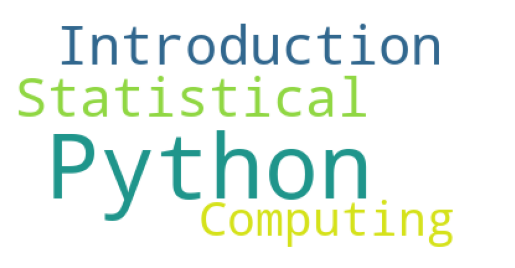

In [8]:
# We start by generating a string with text
# The WordCloud() command generates and object. To display it use "plt.imgshow()"
# Words with higher frequency will tend to appear larger (see advanced options)
# at the end for how to adjust the relative scaling

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Get word frequencies

In [9]:
word_frequencies = WordCloud().process_text(text)
word_frequencies

{'Introduction': 1, 'Statistical': 1, 'Computing': 1, 'Python': 5}

<font size = "5">

Adding stop words

- WordCloud drops common words like "to, from, the, a, ..."
- They're stored in STOPWORDS. We can add more!

(-0.5, 399.5, 199.5, -0.5)

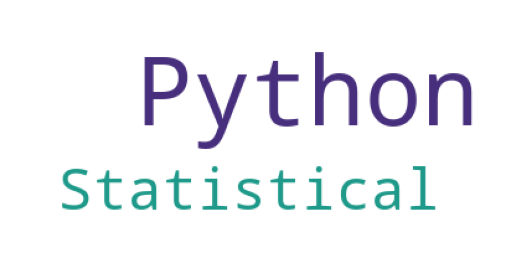

In [11]:
# Create adjusted list of stop words

stop_words = list(STOPWORDS) + ["Introduction","Computing"] # adding more words to the list of stopworkds
text = "Introduction to Statistical Computing Python Python Python Python Python"

# Plot results
# If you don't wan't any stopwords, use "stopwords = []" instead
word_cloud = WordCloud(background_color = "white",
                       stopwords = stop_words).generate(text)
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Try it yourself!

- Search in Wikipedia for an article.
- Copy a paragraph into Python and store it as <br>
a string variable called "text".
- Display a word cloud!

(-0.5, 399.5, 199.5, -0.5)

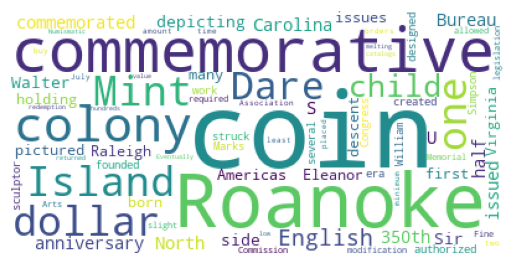

In [13]:
# Write your own code

text = "The Roanoke Island, North Carolina, half dollar is a commemorative coin issued by the U.S. Bureau of the Mint in 1937. It commemorated the 350th anniversary of the Roanoke Colony, depicting on one side Sir Walter Raleigh (pictured), and on the other Eleanor Dare, holding her child, Virginia Dare, the first child of English descent born in an English colony in the Americas. The coin was one of many commemorative issues authorized by Congress in 1936. As the colony was founded in 1587, the coins were struck in 1937. William Marks Simpson, a sculptor who created several commemorative coins of the era, designed the coin. His work required only slight modification by the Commission of Fine Arts. The legislation allowed the Roanoke Island Memorial Association to buy at least 25,000 coins at a time before July 1937; they placed two orders for the minimum amount. Eventually, 21,000 were returned to the Mint for redemption and melting. Numismatic catalogs value the coin in the low hundreds of dollars"

word_cloud = WordCloud(background_color = "white",
                       stopwords = stop_words).generate(text)
plt.imshow(word_cloud)
plt.axis("off")


# <span style="color:darkblue"> III. Word Clouds + Pandas </span>

<font size = "5">

Concatanate column into single long sentence

In [14]:
# We start of with an empty string and sequentiall
# concatenate all the elements of bills["main_action"] together

text_bills = "".join(bills["action"])

<font size = "5">

Create WordCloud

(-0.5, 399.5, 199.5, -0.5)

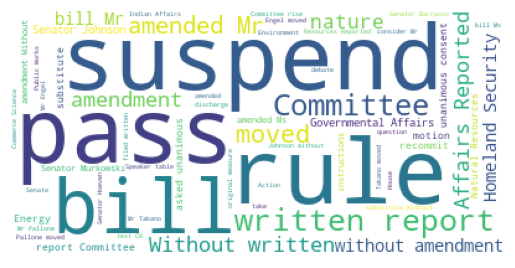

In [328]:
#stopwords = list(STOPWORDS) + ["Introduction","Computing"]
#text = "Introduction to Statistical Computing Python Python Python Python Python"

word_cloud = WordCloud(background_color = "white").generate(text_bills)
                       
plt.imshow(word_cloud)
plt.axis("off")

<font size = "5">

Text by subgroup

In [16]:
# Create sets of words by category
subset_bills_house  = bills_actions.query('category == "house bill"')
subset_bills_senate = bills_actions.query('category == "senate bill"')

# Create strings with all the words mentioned for those observations
text_house  = "".join(subset_bills_house["action"])
text_senate = "".join(subset_bills_senate["action"])

<font size = "5" >
Plotting multiple wordclouds

Text(0.5, 1.0, 'Senate')

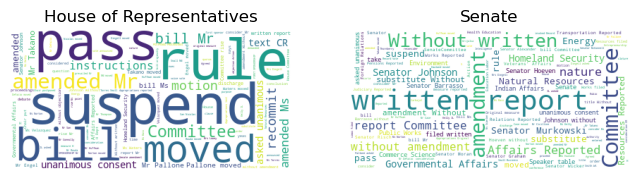

In [17]:
# Use subplots to create figures with multiple plots
fig, list_subfig = plt.subplots(1,2,figsize = [8,3])

word_cloud_house = WordCloud(background_color = "white").generate(text_house)                       
list_subfig[0].imshow(word_cloud_house)
list_subfig[0].axis("off")
list_subfig[0].set_title("House of Representatives")

word_cloud_senate = WordCloud(background_color = "white").generate(text_senate)                       
list_subfig[1].imshow(word_cloud_senate)
list_subfig[1].axis("off")
list_subfig[1].set_title("Senate")

<font size = "5">

**Note:** In general, many possibilities for splitting by subgroups! <br>
Years, geography, type of speaker, type of document, etc.

<font size = "5">
Try it yourself!

- Obtain the text for the categories "house resolution" <br>
and "senate resolution" (separately)
- Plot word clouds for the column "action" for each of the <br>
two categories using ``` plt.subplots()``` and the code <br>
shown above


Text(0.5, 1.0, 'Senate')

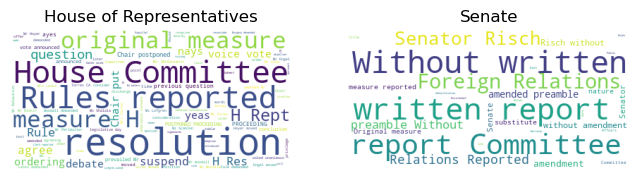

In [19]:
# Write your own code

# Create sets of words by category
house_res  = bills_actions.query('category == "house resolution"')
senate_res = bills_actions.query('category == "senate resolution"')

# Create strings with all the words mentioned for those observations
text_house  = "".join(house_res["action"])
text_senate = "".join(senate_res["action"])

# Use subplots to create figures with multiple plots
fig, list_subfig = plt.subplots(1,2,figsize = [8,3])

word_cloud_house = WordCloud(background_color = "white").generate(text_house)                       
list_subfig[0].imshow(word_cloud_house)
list_subfig[0].axis("off")
list_subfig[0].set_title("House of Representatives")

word_cloud_senate = WordCloud(background_color = "white").generate(text_senate)                       
list_subfig[1].imshow(word_cloud_senate)
list_subfig[1].axis("off")
list_subfig[1].set_title("Senate")

# <span style="color:darkblue"> V. (Optional) Advanced Settings </span>

(-0.5, 399.5, 199.5, -0.5)

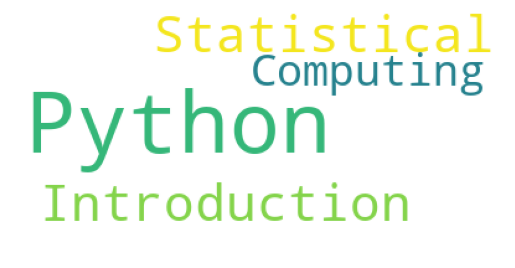

In [332]:
# Relative scaling of high-frequency words

text = "Introduction to Statistical Computing Python Python Python Python Python"
word_cloud = WordCloud(width = 400,
                       height = 200,
                       relative_scaling = 0.5, # or "auto"
                       background_color = "white").generate(text)
plt.imshow(word_cloud)
plt.axis("off")